## Project overview


In this project, I will work towards selecting a model to use to predict whether Titanic passengers of uknown survival status died or survived.

I will then submit my predictions as part of the Kaggle Titanic competition.

Through this project, I am to demonstrate skills of:
- Data exploration and preparation
- Model development and evaluation

My high-level plan for the project is as follows:

1. **Exploring Data** Discover what variables I have, what information they confer, how they are each distributed/structured, their relationships with the target variable. Identify and investigate missing data. Establish whether the testing and training datasets are similar.

2. **Preparting Data** Decide how to handle missingness, what new features can be engineered, how data should be transformed; and which features are suitable for my inclusion in datasets that I will use to make predictions

3. **Testing models** Develop, test and record key metrics for different ML models, parameters and data inputs

4. **Evaluating models** Establish which models perform best wrt various metrics, understand if there are patterns in which models/parameters/data inputs perform best. Decide whether further models/parameters should be explored

5. **Selecting models and making predictions**

# Data Exploration - overview

In [1]:
#import datasets and basic packages
#establish:
# - no of observations in test and train
# - features in test and train
# - what data is missing in test and train
# - overall survival rate in train


In [2]:
import numpy as np
import pandas as pd

Titanic_train_og = pd.read_csv('train.csv')
Titanic_test_og = pd.read_csv('test.csv')

In [3]:
Titanic_train_og.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
len(Titanic_train_og)

891

In [5]:
#^891 observations in train

In [6]:
len(Titanic_test_og)

418

In [7]:
#^481 observations in test

In [8]:
(len(Titanic_test_og)/(len(Titanic_train_og) + len(Titanic_test_og) ))*100

31.932773109243694

In [9]:
#whole data set split roughly into 2/3rds train, 1/3rd test

In [10]:
Titanic_train_og.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [11]:
Titanic_train_og.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
Titanic_test_og.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [13]:
Titanic_test_og.tail(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
#test and train have same features, except for 'Survived', the target variable, which is only in train as expected

#note also that train passenger ID goes from 1 --> 891
#test passenger ID goes from 892--> 1309

In [15]:
#double check this using describe

In [16]:
Titanic_train_og.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
Titanic_test_og.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
#to be pedantic can also check that eash passenger id is unique

len(Titanic_test_og.PassengerId.unique()) == len(Titanic_test_og.PassengerId)


True

In [19]:
len(Titanic_train_og.PassengerId.unique()) == len(Titanic_train_og.PassengerId)


True

In [20]:
#what data is missing in test and train?

In [21]:
Titanic_train_og.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [22]:
Titanic_test_og.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [23]:
#^
#similar proportions of missing data for Age and Cabin
#train has small number of missing values for embarked
#test has small number of missing values for Fare

In [24]:
#what is the avg survival rate (just for train, no data for test)?

Titanic_train_og.Survived.mean()

0.3838383838383838

In [25]:
#38%- 62% split, survived - died.
#skewed but not significantly so

In [26]:
#Summary from the overview phase:

# - no of observations in test and train = 418, 891 respectively

# - features in test and train - same features for both, including Sex, Age, Pclass.
#Only difference is target variable not being present in test, as expected

# - what data is missing in test and train - both datasets have similar proportion
#of missing data in the Age and Cabin features; train has less than 1% of entries missing for embarked

# - overall survival rate in train - 38.4%


# Data Exploration - comparing test and train


In [27]:
#I want to establish:

#Are age distributions similar across test and train?

#Are fare distributions similar acorss test and train?

#Are sibsp and Parch distributions similar across test an train?

#Are proportions based on categorical variables similar acorss test and train?

#Answering these questions will allow me to understand if the test and train sets are similar


In [28]:
#Get ages in test and train, excluding NAs

age_train = Titanic_train_og[Titanic_train_og.Age.isna() == False].Age

age_test = Titanic_test_og[Titanic_test_og.Age.isna() == False].Age

import matplotlib.pyplot as plt


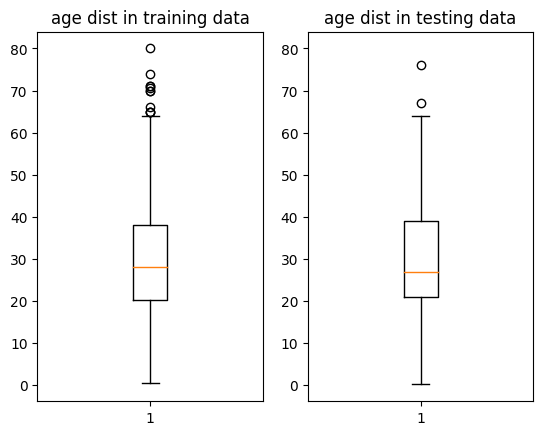

In [29]:
ax1 = plt.subplot(1,2,1)
ax1.boxplot(age_train)
plt.title("age dist in training data")

plt.subplot(122, sharey = ax1)
plt.boxplot(age_test)
plt.title("age dist in testing data")

plt.show()

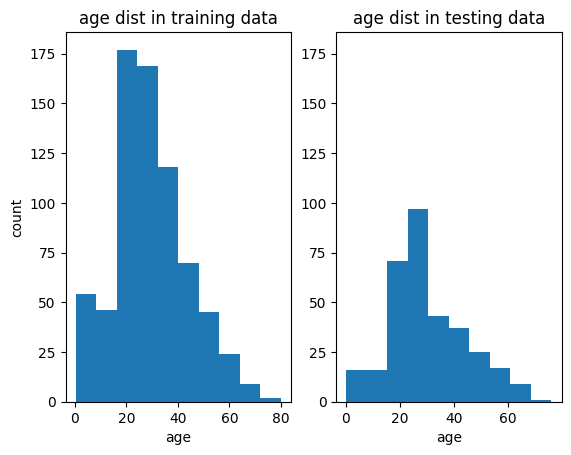

In [30]:
ax1 = plt.subplot(1,2,1)
ax1.hist(age_train)
plt.title("age dist in training data")
plt.xlabel('age')
plt.ylabel('count')

plt.subplot(122, sharey = ax1)
plt.hist(age_test)
plt.title("age dist in testing data")
plt.xlabel('age')

plt.show()

In [31]:
#^ age distributions are similar


#now check fares

In [32]:
fare_train = Titanic_train_og[Titanic_train_og.Fare.isna() == False].Fare

fare_test = Titanic_test_og[Titanic_test_og.Fare.isna() == False].Fare

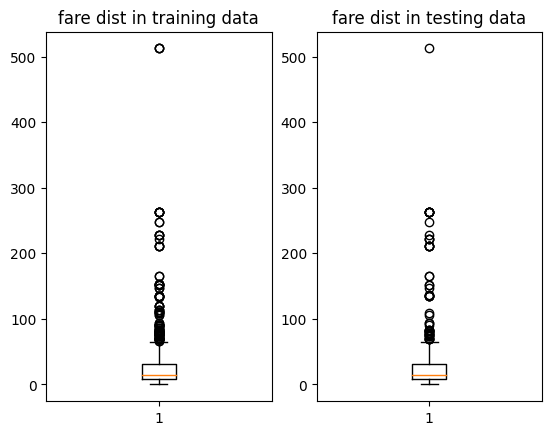

In [33]:
ax1 = plt.subplot(1,2,1)
ax1.boxplot(fare_train)
plt.title("fare dist in training data")

plt.subplot(122, sharey = ax1)
plt.boxplot(fare_test)
plt.title("fare dist in testing data")

plt.show()

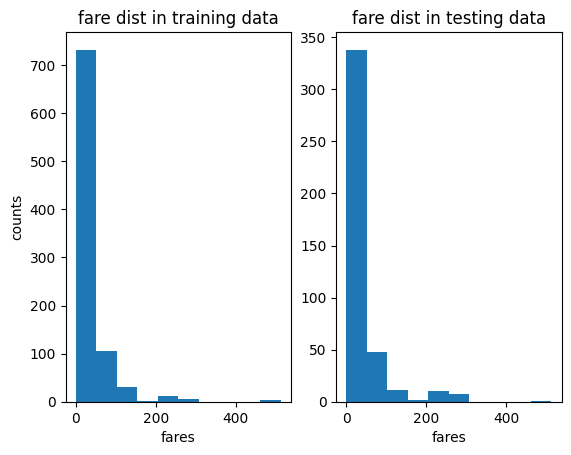

In [34]:
ax1 = plt.subplot(1,2,1)
ax1.hist(fare_train)
plt.title("fare dist in training data")
plt.xlabel('fares')
plt.ylabel('counts')

plt.subplot(122, sharex = ax1)
plt.hist(fare_test)
plt.title("fare dist in testing data")
plt.xlabel('fares')

plt.show()

In [35]:
#Due to the skew, I want to recheck distributions just considering IQ range

Titanic_train_og.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
Titanic_test_og.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [37]:
c1 = fare_test >= 7.8
c2 = fare_test <= 31.5
c3 = np.logical_and(c1, c2)
fare_test_IQR = fare_test[c3]


In [38]:
c4 = fare_train >= 7.9
c5 = fare_train <= 31
c6 = np.logical_and(c4, c5)
fare_train_IQR = fare_train[np.logical_and(c4, c5)]

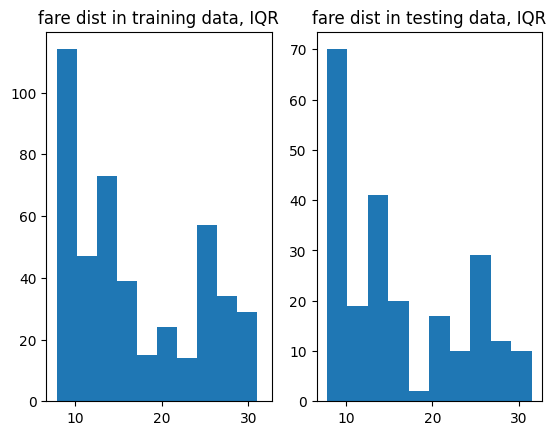

In [39]:
ax1 = plt.subplot(1,2,1)
ax1.hist(fare_train_IQR)
plt.title("fare dist in training data, IQR")

plt.subplot(122, sharex = ax1)
plt.hist(fare_test_IQR)
plt.title("fare dist in testing data, IQR")

plt.show()

In [40]:
#^ fare distributions similar

#now check sibsp and parch

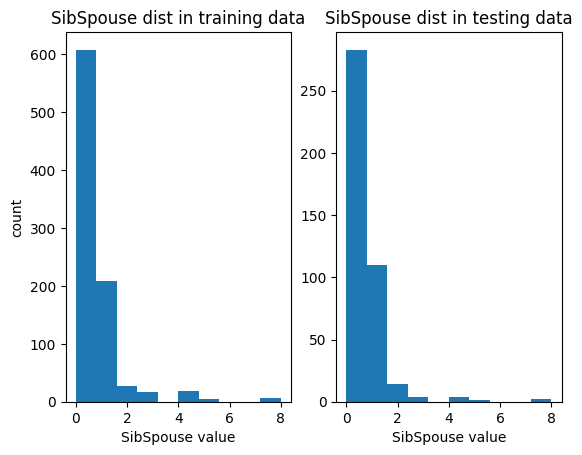

In [41]:
ss_train = Titanic_train_og.SibSp
ss_test = Titanic_test_og.SibSp


ax1 = plt.subplot(1,2,1)
ax1.hist(ss_train)
plt.title("SibSpouse dist in training data")
plt.xlabel("SibSpouse value")
plt.ylabel("count")

plt.subplot(122, sharex = ax1)
plt.hist(ss_test)
plt.title("SibSpouse dist in testing data")
plt.xlabel("SibSpouse value")

plt.show()


In [42]:
#SibSpouse distributions are similar in test and train

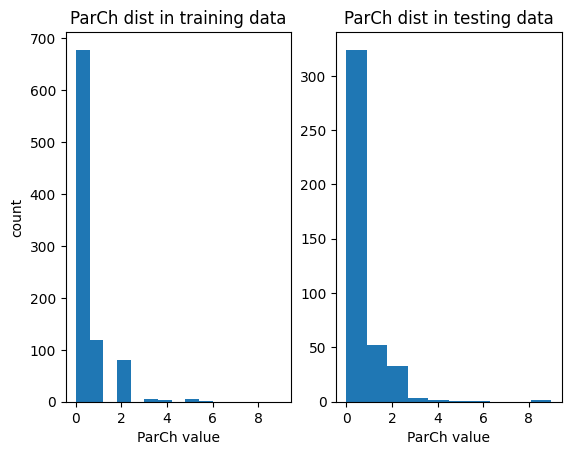

In [43]:
pc_train = Titanic_train_og.Parch
pc_test = Titanic_test_og.Parch


ax1 = plt.subplot(1,2,1)
ax1.hist(pc_train)
plt.title("ParCh dist in training data")
plt.xlabel("ParCh value")
plt.ylabel("count")

plt.subplot(122, sharex = ax1)
plt.hist(pc_test)
plt.title("ParCh dist in testing data")
plt.xlabel("ParCh value")

plt.show()

In [44]:
#Parch distributions are similar - although am interested in counts of extreme values in test

(pc_test >=8).sum()

2

In [45]:
#small enough count not to make these distributions dissimilar

In [46]:
#I now want to look at whether proportions of values amongst categorical variables are similar

#So I want a function that can take in a column name and output value proportions for both test and train:
#e.g. if I input Sex, I would get out a table with one column as categories(male female),
#one column as prop in test, one as prop in train

In [47]:
def compare_value_proportions (column_name):

  train_column = Titanic_train_og[column_name]
  test_column = Titanic_test_og[column_name]

  train_values = train_column.unique()
  test_values = test_column.unique()

  train_val_set = set(train_values)
  test_val_set = set(test_values)

  all_values = np.array(list(train_val_set.union(test_val_set)))

  range_ = np.arange(0,len(all_values))

  storage = pd.DataFrame({'values': all_values, 'prop_in_test': range_, 'prop_in_train': range_ })

  for i in range(0, len(storage)):

    key_val = storage.iloc[i,0]

    storage.iloc[i,1] = (test_column == key_val).mean()
    storage.iloc[i,2] = (train_column == key_val).mean()

  return storage




In [48]:
compare_value_proportions('Sex')

,values,prop_in_test,prop_in_train
0,male,0.636364,0.647587
1,female,0.363636,0.352413


In [49]:
#The male/female split is similar in both test and train

#note that female rate is similar to survival rate in train - possibly in test also

In [50]:
compare_value_proportions('Pclass')

,values,prop_in_test,prop_in_train
0,1,0.255981,0.242424
1,2,0.222488,0.206510
2,3,0.521531,0.551066


In [51]:
#The proportions of 1st, 2nd and 3rd classes are similar in test and train

In [52]:
compare_value_proportions('Embarked')

,values,prop_in_test,prop_in_train
0,nan,0.000000,0.000000
1,S,0.645933,0.722783
2,C,0.244019,0.188552
3,Q,0.110048,0.086420


In [53]:
#The proportions of points of embarkment are somewhat different but still quite similar

In [54]:
#Summary:

#Comparing test and train, the distributions/proportions for Age, Fare, Sibsp, Parch, Sex and Pclass are very similar
#The proportions of points of embarkment differ slightly between the test and train datasets, but not by much

#Moving forward, I also want to find out how similar the information within the ticket, title and cabin columns are


# Data Exploration - messy columns

In [55]:
#Here I want to establish what useful information can be gained from the Cabin, Name and Ticket Columns

#If it is possible to extract useful information, I wnat to see if that information is similar across test and

In [56]:
Titanic_train_messy_features = Titanic_train_og[['Cabin', 'Name', 'Ticket', 'Survived']]

In [57]:
Titanic_train_messy_features

,Cabin,Name,Ticket,Survived
0,NaN,"Braund, Mr. Owen Harris",A/5 21171,0
1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,1
2,NaN,"Heikkinen, Miss. Laina",STON/O2. 3101282,1
3,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,1
4,NaN,"Allen, Mr. William Henry",373450,0
...,...,...,...,...
886,NaN,"Montvila, Rev. Juozas",211536,0
887,B42,"Graham, Miss. Margaret Edith",112053,1
888,NaN,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,0
889,C148,"Behr, Mr. Karl Howell",111369,1


In [58]:
Titanic_train_messy_features.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [59]:
#From Cabin, can get the deck by taking string[0]

In [60]:
Titanic_train_messy_features.Name.values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [61]:
#title starts after first comma and ends after first full stop
#I can use this insight to extract title

In [62]:
Titanic_train_messy_features.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [63]:
#less obvious pattern with ticket numbering
#I will hence not attempt to dig deeper into this feature

In [64]:
#I will now create a deck column for test and train (in a moment, I'll create title column too)

Titanic_train_new_features = Titanic_train_og.copy(deep = True)
Titanic_test_new_features = Titanic_test_og.copy(deep = True)

deck_train = []
cabin_train = list(Titanic_train_og.Cabin)

for i in range(0, len(cabin_train)):

  if isinstance(cabin_train[i], str):

    deck_train.append(cabin_train[i][0])

  else:

    deck_train.append("unknown")


Titanic_train_new_features['deck'] = deck_train




In [65]:
deck_test = []
cabin_test = list(Titanic_test_og.Cabin)

for i in range(0, len(cabin_test)):

  if isinstance(cabin_test[i], str):

    deck_test.append(cabin_test[i][0])

  else:

    deck_test.append("unknown")


Titanic_test_new_features['deck'] = deck_test

In [66]:
#I will now amend the function I used to compare proportions between test and train, as I have changed the df
#Note, if I foresaw using this function again with yet another dataset, I would invest time in
#creating a function that took in a df as an argument

In [67]:
def compare_value_proportions_2 (column_name):

  train_column = Titanic_train_new_features[column_name]
  test_column = Titanic_test_new_features[column_name]

  train_values = train_column.unique()
  test_values = test_column.unique()

  train_val_set = set(train_values)
  test_val_set = set(test_values)

  all_values = np.array(list(train_val_set.union(test_val_set)))



  range_ = np.arange(0,len(all_values))

  storage = pd.DataFrame({'values': all_values, 'prop_in_test': range_, 'prop_in_train': range_ })

  for i in range(0, len(storage)):

    key_val = storage.iloc[i,0]

    storage.iloc[i,1] = (test_column == key_val).mean()
    storage.iloc[i,2] = (train_column == key_val).mean()

  return storage

In [68]:
compare_value_proportions_2('deck')

,values,prop_in_test,prop_in_train
0,B,0.043062,0.052750
1,C,0.083732,0.066218
2,G,0.002392,0.004489
3,F,0.019139,0.014590
4,D,0.031100,0.037037
5,unknown,0.782297,0.771044
6,A,0.016746,0.016835
7,T,0.000000,0.001122
8,E,0.021531,0.035915


In [69]:
#Proportions of passengers in each deck is similar across test and train datasets

In [70]:
#Now to create title column

In [71]:
import re


In [72]:
def get_title(name):

  second_part = re.split(',', name, maxsplit = 1)[1]
  title = re.split('. ', second_part, maxsplit = 1)[0]

  return title

In [73]:
title_train = []
name_train = Titanic_train_new_features.Name

for i in range(0, len(name_train)):

  title = get_title(name_train[i])
  title_train.append(title)

Titanic_train_new_features['title'] = title_train



In [74]:
title_test = []
name_test = Titanic_test_new_features.Name

for i in range(0, len(name_test)):

  titles = get_title(name_test[i])
  title_test.append(titles)

Titanic_test_new_features['title'] = title_test

In [75]:
compare_value_proportions_2('title')

,values,prop_in_test,prop_in_train
0,Jonkheer,0.000000,0.001122
1,Col,0.004785,0.002245
2,Mr,0.574163,0.580247
3,Master,0.050239,0.044893
4,Miss,0.186603,0.204265
5,th,0.000000,0.001122
6,Dona,0.002392,0.000000
7,Mrs,0.172249,0.140292
8,Sir,0.000000,0.001122
9,Dr,0.002392,0.007856


In [76]:
#Proportions of common titles - Mr, Mrs, Miss are similar - some deviations with rarer titles, which is to be expected
#as rare events are less likely to follow patterns

In [77]:
#I am interested in finding out a bit more about titles I have not heard of before

In [78]:
Titanic_train_new_features[Titanic_train_new_features.title == " Don"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,unknown,Don


In [79]:
Titanic_train_new_features[Titanic_train_new_features.title == " Mme"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,title
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3,B35,C,B,Mme


In [80]:
#probably Madam abbreviated

In [81]:
Titanic_train_new_features[Titanic_train_new_features.title == " Jonkheer"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,title
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,unknown,Jonkheer


In [82]:
#is a legit title based on google search

In [83]:
Titanic_train_new_features[Titanic_train_new_features.title == " th"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,deck,title
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,B,th


In [84]:
#short for 'th' - makes sense

In [85]:
#change title to countess

Titanic_train_new_features.loc[759, 'title'] = "Countess"

In [86]:
#Summary:

#Of the initially messy columns - cabin, name and ticket
#I have been able to extract useful information from cabin and name

#I have created two new features - deck and title, which I will keep for now
#these features have allowed me to see that proportions of values for deck and title are
#similar across the test and train datasets

In [87]:
#Overall, I am now satisfied that the test and train data sets are similar enough
#for me to proceed in train to predict test, without using sampling methods
#to make these sets more comparable

In [88]:
#I am going to now drop cabin and name, as they have been superceded by deck and title

Titanic_train_new_features.drop(['Cabin', 'Name'], axis = 1, inplace = True)
Titanic_test_new_features.drop(['Cabin', 'Name'], axis = 1, inplace = True)


# Data Exploration - investigating missing data

In [89]:
#I now need to start thinking about how I am going to handle missing data

#I first want to establish the following:

#Is age missing at the same rate for different groups (e.g. male, female; 1st class - 2nd - 3rd) or are there differences?

#Is cabin data missing at the same rate for these different groups?

#What Fare(test) and Embarkment(train) data are missing?

In [90]:
def comparing_missing_rates(df, na_column_name, comparison_column_name):


  categorical_values = df[comparison_column_name].unique()
  filler_array = np.arange(0, len(categorical_values))

  storage = pd.DataFrame({'values': categorical_values, 'missing_rate': filler_array, 'count': filler_array})

  #column_with_nas = df[na_column_name]

  for i in range(0, len(storage)):

    filter = storage.iloc[i,0]
    condition = df[comparison_column_name] == filter

    df_filtered = df[condition]

    filtered_column = df_filtered[na_column_name]

    if na_column_name == "Age":
      storage.iloc[i, 1] = filtered_column.isna().mean()
      storage.iloc[i, 2] = len(filtered_column)

    elif na_column_name == "deck":


      storage.iloc[i, 1] = np.mean(filtered_column == "unknown")
      storage.iloc[i, 2] = len(filtered_column)


  return storage

In [91]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'Sex')

,values,missing_rate,count
0,male,0.214905,577
1,female,0.168790,314


In [92]:
comparing_missing_rates(Titanic_test_new_features, 'Age', 'Sex')

,values,missing_rate,count
0,male,0.229323,266
1,female,0.164474,152


In [93]:
#slightly higher rate of missing age data amongst men

In [94]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'Pclass')

,values,missing_rate,count
0,3,0.276986,491
1,1,0.138889,216
2,2,0.059783,184


In [95]:
comparing_missing_rates(Titanic_test_new_features, 'Age', 'Pclass')

,values,missing_rate,count
0,3,0.330275,218
1,2,0.053763,93
2,1,0.084112,107


In [96]:
#significantly higher rate of missing age data amongst 3rd class

#The rate of missing age data for 1st class passengers is dissimilar across test and train


In [97]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'deck')

,values,missing_rate,count
0,unknown,0.229985,687
1,C,0.135593,59
2,E,0.062500,32
3,G,0.000000,4
4,D,0.060606,33
5,A,0.200000,15
6,B,0.042553,47
7,F,0.153846,13
8,T,0.000000,1


In [98]:
comparing_missing_rates(Titanic_test_new_features, 'Age', 'deck')

,values,missing_rate,count
0,unknown,0.250765,327
1,B,0.000000,18
2,E,0.111111,9
3,A,0.000000,7
4,C,0.000000,35
5,D,0.153846,13
6,F,0.125000,8
7,G,0.000000,1


In [99]:
#rates of missing age vary significantly between decks - for both test and train
#unknown being big contributor to avg missing rate

In [100]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'Embarked')

,values,missing_rate,count
0,S,0.139752,644
1,C,0.226190,168
2,Q,0.636364,77
3,NaN,NaN,0


In [101]:
comparing_missing_rates(Titanic_test_new_features, 'Age', 'Embarked')

,values,missing_rate,count
0,Q,0.521739,46
1,S,0.155556,270
2,C,0.196078,102


In [102]:
#^Much more age data missing amongst passengers who got on at Queens

In [103]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'Survived')

,values,missing_rate,count
0,0,0.227687,549
1,1,0.152047,342


In [104]:
#age data more likely to be missing for those who died (which may be because age is more likely to be missing for men and 3rd class passengers)

In [105]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'Parch')

,values,missing_rate,count
0,0,0.231563,678
1,1,0.067797,118
2,2,0.150000,80
3,5,0.000000,5
4,3,0.000000,5
5,4,0.000000,4
6,6,0.000000,1


In [106]:
comparing_missing_rates(Titanic_test_new_features, 'Age', 'Parch')

,values,missing_rate,count
0,0,0.237654,324
1,1,0.038462,52
2,3,0.000000,3
3,2,0.121212,33
4,4,0.500000,2
5,6,0.000000,1
6,5,0.000000,1
7,9,1.000000,2


In [107]:
#Parch 0 suggests not children, so largest group without age data likely to be adults

In [108]:
comparing_missing_rates(Titanic_train_new_features, 'Age', 'SibSp')

,values,missing_rate,count
0,1,0.124402,209
1,0,0.225329,608
2,3,0.250000,16
3,4,0.000000,18
4,2,0.107143,28
5,5,0.000000,5
6,8,1.000000,7


In [109]:
comparing_missing_rates(Titanic_test_new_features, 'Age', 'SibSp')

,values,missing_rate,count
0,0,0.243816,283
1,1,0.118182,110
2,2,0.214286,14
3,3,0.000000,4
4,4,0.000000,4
5,5,0.000000,1
6,8,0.500000,2


In [110]:
#I now want to look at missing deck data, and whethr other categories affect the rate at which deck data is missing

In [111]:
comparing_missing_rates(Titanic_train_new_features, 'deck', 'Pclass')

,values,missing_rate,count
0,3,0.975560,491
1,1,0.185185,216
2,2,0.913043,184


In [112]:
comparing_missing_rates(Titanic_test_new_features, 'deck', 'Pclass')

,values,missing_rate,count
0,3,0.981651,218
1,2,0.924731,93
2,1,0.252336,107


In [113]:
#^most second and third class passengers are in unknown deck

In [114]:
comparing_missing_rates(Titanic_train_new_features, 'deck', 'Sex')

,values,missing_rate,count
0,male,0.814558,577
1,female,0.691083,314


In [115]:
comparing_missing_rates(Titanic_test_new_features, 'deck', 'Sex')

,values,missing_rate,count
0,male,0.823308,266
1,female,0.710526,152


In [116]:
#^males more likely to be in unknown deck

In [117]:
comparing_missing_rates(Titanic_train_new_features, 'deck', 'Embarked')

,values,missing_rate,count
0,S,0.799689,644
1,C,0.589286,168
2,Q,0.948052,77
3,NaN,NaN,0


In [118]:
comparing_missing_rates(Titanic_test_new_features, 'deck', 'Embarked')

,values,missing_rate,count
0,Q,0.978261,46
1,S,0.848148,270
2,C,0.519608,102


In [119]:
#^Q still has highest missing data - either because of their processes or the type of passenger that came aboard there

In [120]:
comparing_missing_rates(Titanic_train_new_features, 'deck', 'Parch')

,values,missing_rate,count
0,0,0.792035,678
1,1,0.669492,118
2,2,0.712500,80
3,5,1.000000,5
4,3,1.000000,5
5,4,0.750000,4
6,6,1.000000,1


In [121]:
comparing_missing_rates(Titanic_test_new_features, 'deck', 'Parch')

,values,missing_rate,count
0,0,0.802469,324
1,1,0.673077,52
2,3,0.000000,3
3,2,0.818182,33
4,4,0.500000,2
5,6,1.000000,1
6,5,1.000000,1
7,9,1.000000,2


In [122]:
#missing deck data is consisently high accross all parch values (where the group count is large enough for there to be patterns),
#wouldn't want to read much into patterns here

In [123]:
comparing_missing_rates(Titanic_train_new_features, 'deck', 'SibSp')

,values,missing_rate,count
0,1,0.669856,209
1,0,0.792763,608
2,3,0.812500,16
3,4,1.000000,18
4,2,0.785714,28
5,5,1.000000,5
6,8,1.000000,7


In [124]:
comparing_missing_rates(Titanic_test_new_features, 'deck', 'SibSp')

,values,missing_rate,count
0,0,0.840989,283
1,1,0.627273,110
2,2,0.714286,14
3,3,0.750000,4
4,4,1.000000,4
5,5,1.000000,1
6,8,1.000000,2


In [125]:
#similar story as with parch

In [126]:
comparing_missing_rates(Titanic_train_new_features, 'deck', 'Survived')

,values,missing_rate,count
0,0,0.876138,549
1,1,0.602339,342


In [127]:
#those in unknown deck more likely to have died

In [128]:
#Summary:

#For age, it is particularly noteable that there is a higher rate of missing data amongst men and 3rd class passengers
#For deck, this data is more often missing than not - with deck data generally only collected for first class passengers

#There is also alot more data missing from passengers who embarked at Queens

# Data Exploration - Which features on their own confer most information gain

In [129]:
#Information Gain can help us to measure how important features are in helping us predict whether
#a passenger lives or dies

#At its core information gain tells us whether an explainer variable can split the data up, so
#that the target variables are more homogenous within the split groups that within the original group

#For example, let's hypothetically say there is a 50:50 chance of surviving on the titanic overall
#but if we consider each gender separately, males have a 25% chances of survival (vs 75% chance of dying)
#and females have a 75% chance of survival
#Here gender allows us to split the target variable, survival , into more homogenous groups
#We can hence say it confers information gain

In [130]:
#In this section I want to get an idea of which features confer the most Information Gain
#(Note, the term Mutual Information Gain refers to Information gained with respect to a particular target variable

#SKLearn's mutual_info_classif gives the mutual information gain between each feature (considered by itself) and the target variable

#sklearn's mutual_info_classif requires data to be numeric, so will have to do some prepartion to use the function

#I will prepare the data as follows for use with this function

#Sex --> female boolean
#Ticket --> remove
#Embarked --> One Hot Encode (OHE)
#deck --> OHE
#title --> leave out of analysis, due to large number of categories


In [131]:
#create binary female column, in place of sex column

female = []

for i in range(0, len(Titanic_train_new_features)):

  if Titanic_train_new_features.Sex[i] == 'female':
    female.append(1)

  elif Titanic_train_new_features.Sex[i] == 'male':
    female.append(0)

Titanic_train_new_features['female'] = female


In [132]:
Titanic_train_new_features.drop(['Ticket'], axis = 1, inplace = True)

In [133]:
def OHE(column):

  column = column.to_frame()

  from sklearn import preprocessing

  encoder = preprocessing.OneHotEncoder()
  encoded_array = encoder.fit_transform(column).toarray()

  ohedf = pd.DataFrame(encoded_array)
  ohedf.columns = encoder.get_feature_names_out(column.columns.tolist())

  return ohedf

In [134]:
embarked_OHE = OHE(Titanic_train_new_features.Embarked)

In [135]:
deck_OHE = OHE(Titanic_train_new_features.deck)

In [136]:
Titanic_train_new_features = pd.concat([Titanic_train_new_features, deck_OHE, embarked_OHE], axis = 1)

In [137]:
#I will create X_IG, and y_IG just for the purpose of this information gain analysis

In [138]:
X_IG = Titanic_train_new_features.drop(['Survived', 'deck', 'Embarked', 'Sex', 'title'], axis = 1)
y_IG = Titanic_train_new_features.Survived

In [139]:
#To use the sklearn mutual information function I want to fill in missing age values

In [140]:
X_IG.isna().mean()

PassengerId     0.000000
Pclass          0.000000
Age             0.198653
SibSp           0.000000
Parch           0.000000
Fare            0.000000
female          0.000000
deck_A          0.000000
deck_B          0.000000
deck_C          0.000000
deck_D          0.000000
deck_E          0.000000
deck_F          0.000000
deck_G          0.000000
deck_T          0.000000
deck_unknown    0.000000
Embarked_C      0.000000
Embarked_Q      0.000000
Embarked_S      0.000000
Embarked_nan    0.000000
dtype: float64

In [141]:
X_IG.Age.median()

28.0

In [142]:
X_IG.fillna(28, inplace = True)

In [143]:
#I can now run the function to find the information gain  from each feature
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_IG, y_IG)
mutual_info

array([0.01844928, 0.04422293, 0.00444474, 0.02267686, 0.        ,
       0.13984675, 0.16203226, 0.00116335, 0.        , 0.01703773,
       0.00796304, 0.02026187, 0.00840378, 0.        , 0.00638973,
       0.05455745, 0.02034213, 0.        , 0.00364297, 0.        ])

In [144]:
pd.DataFrame({'feature': X_IG.columns, 'Info_gain': mutual_info}).sort_values(['Info_gain'], ascending = False)

,feature,Info_gain
6,female,0.162032
5,Fare,0.139847
15,deck_unknown,0.054557
1,Pclass,0.044223
3,SibSp,0.022677
16,Embarked_C,0.020342
11,deck_E,0.020262
0,PassengerId,0.018449
9,deck_C,0.017038
12,deck_F,0.008404


Noting that PassengerId should confer no useful information, we can use this as a benchmark for whether a feature is useful or not.

interesting things to note are:
- Fare confers more information than class
- Age is lower down than expected, although we have imputed 20% of data using median (very basic method) + IG works via quantization so it may be that some quantiles are useful, whereas others are not.
- Deck unknown also scores higher than class



# Data Exploration - investigating interaction between features

Because a number of the features are likely to interact with each other (Fare, deck and class are likely to be closely co-dependent; gender and title are linked), I want to find out which features contribute more to overall information gain.

I want a function that takes in two features, and can tell me:
- What information gain there is from each of the features independently
- what the total information gain is from the two features combined
- The amount of shared information - i.e. the difference between the sum of the two features' independent contributions, and the total information gain


This should ultimately allow me to answer questions like:
- Is Fare more indicative of survival than class?
- Does point of embarkment provide any useful information if we already take into account Class?
- Are titles more indicative of survival than genders?





In [145]:
#The features that are likely to be interrelated are
#female and title
#class, fare and deck - and possibly embarkment

#I will hence create a focused df that contains these features and the target

df_mvig = Titanic_train_new_features[['Pclass','female','Fare','deck','Embarked','title', 'Survived']]

In [146]:
#I need to turn fare into a categorical feature by binning it
bin_labels = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10']

df_mvig['Fare_quantised'] = pd.qcut(df_mvig['Fare'], q = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8,0.9,1], labels = bin_labels)


<ipython-input-146-e5a06ceacd55>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvig['Fare_quantised'] = pd.qcut(df_mvig['Fare'], q = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8,0.9,1], labels = bin_labels)


In [147]:
df_mvig

,Pclass,female,Fare,deck,Embarked,title,Survived,Fare_quantised
0,3,0,7.2500,unknown,S,Mr,0,q1
1,1,1,71.2833,C,C,Mrs,1,q9
2,3,1,7.9250,unknown,S,Miss,1,q3
3,1,1,53.1000,C,S,Mrs,1,q9
4,3,0,8.0500,unknown,S,Mr,0,q3
...,...,...,...,...,...,...,...,...
886,2,0,13.0000,unknown,S,Rev,0,q5
887,1,1,30.0000,B,S,Miss,1,q8
888,3,1,23.4500,unknown,S,Miss,0,q7
889,1,0,30.0000,C,C,Mr,1,q8


In [148]:
#The first function will take in f1 and f2, and tell me the IG from f1,
#the IG from f1 and f2 and the IG of f2 given f1
#IG(f2|f1) = IG (f2 + f1) - IG(f1)
def multivariate_IG(df,feature1_name, feature2_name):

  OG_P_survival = df.Survived.mean()
  OG_P_died = 1 - OG_P_survival


  initial_entropy = -1*(OG_P_survival*(np.log2(OG_P_survival)) + OG_P_died*(np.log2(OG_P_died)))

  feature_1_values = df[feature1_name].unique()
  filler_array = np.arange(0, len(feature_1_values))

  storage_1 = pd.DataFrame({feature1_name + ' values': feature_1_values, 'entropy': filler_array, 'count': filler_array, 'wgt_entropy': filler_array})

  for i in range(0, len(storage_1)):

    f1_value = storage_1.iloc[i,0]

    df_filtered_1f = df[df[feature1_name]== f1_value]

    f1_P_survival = df_filtered_1f.Survived.mean()
    f1_P_died = 1 - f1_P_survival

    storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
    storage_1.iloc[i,2] = len(df_filtered_1f)
    storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))

  f1_entropy = storage_1['wgt_entropy'].sum()

  IG_f1 = initial_entropy - f1_entropy


  feature_2_values = df[feature2_name].unique()

  storage_2 = pd.DataFrame([(x, y) for x in feature_1_values for y in feature_2_values],
                           columns = [feature1_name + ' values', feature2_name + ' values'])
  filler_array_2 = np.arange(0, len(storage_2))

  extra_df = pd.DataFrame({'entropy': filler_array_2, 'count': filler_array_2, 'wgt_entropy': filler_array_2})


  storage_2 = pd.concat([storage_2, extra_df], axis = 1)

  for i in range(0, len(storage_2)):

    f1_val = storage_2.iloc[i,0]
    f2_val = storage_2.iloc[i,1]

    condition_1 = df[feature1_name] == f1_val
    condition_2 = df[feature2_name] == f2_val
    combined_condition = np.logical_and(condition_1, condition_2)

    df_filtered_2f = df[combined_condition]

    f2_P_survival = df_filtered_2f.Survived.mean()
    f2_P_died = 1 - f2_P_survival

    storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
    storage_2.iloc[i,3] = len(df_filtered_2f)
    storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))

  f1_2_entropy = storage_2['wgt_entropy'].sum()

  IG_f1_2 = initial_entropy - f1_2_entropy


  results = pd.DataFrame({'metric':['initial_entropy', 'IG from ' + feature1_name,
                                     'IG from ' + feature1_name + ' and ' + feature2_name,
                                    'IG from ' + feature2_name + ' given ' + feature1_name],
                          'value': [initial_entropy ,IG_f1, IG_f1_2, IG_f1_2 - IG_f1]})


  return results

In [149]:
multivariate_IG(df_mvig,'Pclass', 'deck')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))


,metric,value
0,initial_entropy,0.960708
1,IG from Pclass,0.083831
2,IG from Pclass and deck,0.110336
3,IG from deck given Pclass,0.026505


In [150]:
multivariate_IG(df_mvig,'deck', 'Pclass')

<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: invalid value encountered in double_scalars
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
<ipython-input-148-a2fde5d0923c>:28: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:28: RuntimeWarning: invalid value encountered in double_scalars
  storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f

,metric,value
0,initial_entropy,0.960708
1,IG from deck,0.079524
2,IG from deck and Pclass,0.110336
3,IG from Pclass given deck,0.030812


In [151]:
#I can use the values in the complementary tables to capture details of infomation gain from features A and B independently,
#shared information gain (because of how values co-occur), and tital IG)


In [152]:
def IG_metrics_2_features(df, feature1_name, feature2_name):



  table_1 = multivariate_IG(df, feature1_name, feature2_name)
  table_2 = multivariate_IG(df, feature2_name, feature1_name)

  storage = pd.DataFrame({'metrics': ['Solo IG ' + feature1_name, 'Solo IG ' + feature2_name, 'shared IG', 'total_IG'],
                          'values': [table_1.iloc[1,1], table_2.iloc[1,1],
                                     table_1.iloc[1,1] - table_2.iloc[3,1],
                                     table_1.iloc[2,1]]})

  return storage




In [153]:
IG_metrics_2_features(df_mvig, 'deck', 'Pclass')

<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: invalid value encountered in double_scalars
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
<ipython-input-148-a2fde5d0923c>:28: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:28: RuntimeWarning: invalid value encountered in double_scalars
  storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f

,metrics,values
0,Solo IG deck,0.079524
1,Solo IG Pclass,0.083831
2,shared IG,0.053019
3,total_IG,0.110336


In [154]:
#significant overlap in information between deck and class - but also a sizeable increase in information for having both values

In [155]:
IG_metrics_2_features(df_mvig, 'Pclass', 'Fare_quantised')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f

,metrics,values
0,Solo IG Pclass,0.083831
1,Solo IG Fare_quantised,0.100648
2,shared IG,0.043808
3,total_IG,0.140671


In [156]:
#reasonbly strong overlap in information, but still a reasonable gain in information from having both

In [157]:
IG_metrics_2_features(df_mvig, 'Pclass', 'Embarked')

,metrics,values
0,Solo IG Pclass,0.083831
1,Solo IG Embarked,0.024047
2,shared IG,0.005127
3,total_IG,0.102752


In [158]:
#emabrked has low information gain
#overlap is minimal

In [159]:
IG_metrics_2_features(df_mvig, 'Fare_quantised', 'deck')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f

,metrics,values
0,Solo IG Fare_quantised,0.100648
1,Solo IG deck,0.079524
2,shared IG,0.014616
3,total_IG,0.165556


In [160]:
#not much shared information gain - worth having both

In [161]:
IG_metrics_2_features(df_mvig, 'Fare_quantised', 'Embarked')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f

,metrics,values
0,Solo IG Fare_quantised,0.100648
1,Solo IG Embarked,0.024047
2,shared IG,-0.014200
3,total_IG,0.138895


In [162]:
multivariate_IG(df_mvig, 'Fare_quantised', 'Embarked')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))


,metric,value
0,initial_entropy,0.960708
1,IG from Fare_quantised,0.100648
2,IG from Fare_quantised and Embarked,0.138895
3,IG from Embarked given Fare_quantised,0.038247


In [163]:
multivariate_IG(df_mvig, 'Embarked', 'Fare_quantised')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))


,metric,value
0,initial_entropy,0.960708
1,IG from Embarked,0.024047
2,IG from Embarked and Fare_quantised,0.138895
3,IG from Fare_quantised given Embarked,0.114848


In [164]:
#based on IG(FQ|E) > IG(FQ), it does appear that the shared portion of information is negative
#which suggests that using these two features together makes the data more hetrogenous with respect to the target variable



In [165]:
#hypothesis is that the NAN values for entropy interfere with the result
#if you have a subset with all 0s or 1s then the count contributes to weightings, but there is an nan (treated as zero) from entropy
#so entropy with both features lower than it should be, so IG higher than it should be
#shared = A_indep + B_indep - All: if all is slightly overstated, could make shared negative

#read small negative values as zero

In [166]:
IG_metrics_2_features(df_mvig, 'deck', 'Embarked')

<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: invalid value encountered in double_scalars
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died)))
<ipython-input-148-a2fde5d0923c>:28: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:28: RuntimeWarning: invalid value encountered in double_scalars
  storage_1.iloc[i,3] = (-1*(f1_P_survival*(np.log2(f1_P_survival)) + f1_P_died*(np.log2(f1_P_died))))*len(df_filtered_1f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f

,metrics,values
0,Solo IG deck,0.079524
1,Solo IG Embarked,0.024047
2,shared IG,0.006515
3,total_IG,0.097056


In [167]:
#Deck and point of embarkment do not share much information gain

In [168]:
IG_metrics_2_features(df_mvig, 'female', 'title')

<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:60: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,2] = -1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died)))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: divide by zero encountered in log2
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:62: RuntimeWarning: invalid value encountered in double_scalars
  storage_2.iloc[i,4] = (-1*(f2_P_survival*(np.log2(f2_P_survival)) + f2_P_died*(np.log2(f2_P_died))))*len(df_filtered_2f)*(1/len(df))
<ipython-input-148-a2fde5d0923c>:26: RuntimeWarning: divide by zero encountered in log2
  storage_1.iloc[i,1] = -1*(f1_P_survival*(np.log2(f1_P_survival)) + f

,metrics,values
0,Solo IG female,0.217660
1,Solo IG title,0.256866
2,shared IG,0.216104
3,total_IG,0.258422


In [169]:
#Summary

#with class/fare, class/deck there was significant overlap - but so too were there gains in information from having
# both features, rather than just one

#With embarked, for all paired features, there was little overlap in information - but there was also little info contributed from embarked

#With deck and fare there was little shared information, and reasoable amount from each

#information due to sex accounts for over 80% of information due to title, but in absolute terms title still adds information


# Data Exploration - key takeaways

1. The test and train sets are very similar, so we can assume that patterns that exist in train also exist in test.

2. The cabin and name features can be used to create deck and title features, which show patterns and are more manageable

3. Age data is more likely to be missing for males and for 3rd class passengers

4. Cabin data is missing in most cases for 2nd and 3rd class passengers, still some missing data (~20%) for 1st class.

5. Missing data may also be due to processing issues at Queens

6. Information gain was highest for: female, fare, deck_unknown, deck_D, age, embarked_C, sibsp deck_T and Pclass - note that algorithm had bugs in how it dealt with nas (due to underfined log calculations) - so take this as indicative not facts

7. It was noteworthy that fare and deck_unknown were more informative than class

8. While there was a lot of shared information between fare/deck/class, there seem to be benefits from including both variables.

9. Embarked did not appear to be a useful variable

10. Title's information was 80% accounted for by gender, but it did add a reasonable absolute value.



# Data Preparation - overview

In this section I will:

- initialize a prepared dataset, so that I can make use of features already engineered, and do so in an organised way
- Handle missing data
- Decide on scaling method for numeric data
- Decide which features to keep


# Data Preparation - initializing prepared data

In [170]:
#I want to create a data set made of train and test, so that I can treat data in the same way as I go
#to make sure I don't mix them up, I will create a tag that says whether the data is test or train

Titanic_test_og['test_train'] = 'test'
Titanic_train_og['test_train'] = 'train'

Titanic_master_X = Titanic_train_og.copy(deep = True)
Titanic_master_X.drop(['Survived'], axis = 1, inplace = True)

Titanic_master_X = pd.concat([Titanic_master_X, Titanic_test_og.copy(deep = True)], axis = 0)

Titanic_master_X


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_train
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [171]:
#some initial changes to make

#turn sex --> female bool
#name --> title
#cabin --> deck
#remove ticket
#OHE: embarked, deck, title

In [172]:
Titanic_master_X.reset_index(inplace = True)
Titanic_master_X

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_train
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
1307,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test


In [173]:
deck = []
cabin = list(Titanic_master_X.Cabin)

for i in range(0, len(cabin)):

  if isinstance(cabin[i], str):

    deck.append(cabin[i][0])

  else:

    deck.append("unknown")


Titanic_master_X['deck'] = deck


In [174]:
title = []
name = list(Titanic_master_X.Name)

for i in range(0, len(name)):

  title_val = get_title(name[i])
  title.append(title_val)

Titanic_master_X['title'] = title

In [175]:
female = []

sex = list(Titanic_master_X.Sex)

for i in range(0, len(sex)):

  if sex[i]== 'female':
    female.append(1)
  elif sex[i] == 'male':
    female.append(0)

Titanic_master_X['female'] = female

In [176]:
Titanic_master_X = pd.concat([Titanic_master_X,
                              OHE(Titanic_master_X.Embarked),
                              OHE(Titanic_master_X.deck),
                              OHE(Titanic_master_X.title)],
                             axis = 1)



In [177]:
Titanic_master_old_columns = Titanic_master_X[['Embarked', 'deck', 'title', 'Ticket', 'Sex', 'Name', 'Cabin']]

In [178]:
Titanic_master_X.drop(['Embarked', 'deck', 'title'], axis = 1, inplace = True)

In [179]:
Titanic_master_X.drop(['Ticket', 'Sex', 'Name', 'Cabin'], axis = 1, inplace = True)

In [180]:
Titanic_master_X.isna().mean()

index              0.000000
PassengerId        0.000000
Pclass             0.000000
Age                0.200917
SibSp              0.000000
Parch              0.000000
Fare               0.000764
test_train         0.000000
female             0.000000
Embarked_C         0.000000
Embarked_Q         0.000000
Embarked_S         0.000000
Embarked_nan       0.000000
deck_A             0.000000
deck_B             0.000000
deck_C             0.000000
deck_D             0.000000
deck_E             0.000000
deck_F             0.000000
deck_G             0.000000
deck_T             0.000000
deck_unknown       0.000000
title_ Capt        0.000000
title_ Col         0.000000
title_ Don         0.000000
title_ Dona        0.000000
title_ Dr          0.000000
title_ Jonkheer    0.000000
title_ Lady        0.000000
title_ Major       0.000000
title_ Master      0.000000
title_ Miss        0.000000
title_ Mlle        0.000000
title_ Mme         0.000000
title_ Mr          0.000000
title_ Mrs         0

# Data Prepation - handling missing data

If I keep deck information, I will want to create unknown data as a distinct category.

So my focus here is on handling missing age data, with the two candidate solutions being :
- quantization and keeping unknown as a category
- imputation, and keeping variable as continous

I also want to handle missing fare data

For missing embarked data I can just use unknown as a separate category

In [181]:
#I'll start with fare

condition = Titanic_master_X.Fare.isna()
Titanic_master_X[condition]


,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,test_train,female,Embarked_C,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ th
1043,152,1044,3,60.5,0,0,NaN,test,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [182]:
#To handle missing fare data I will just impute Fare for 3rd class


In [183]:
avg_fare_thirdclass = Titanic_master_X[Titanic_master_X.Pclass == 3].Fare.mean()

In [184]:
Titanic_master_X.loc[1043,'Fare'] = avg_fare_thirdclass

In [185]:
Titanic_master_X[Titanic_master_X.PassengerId == 1044]

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,test_train,female,Embarked_C,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ th
1043,152,1044,3,60.5,0,0,13.302889,test,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [186]:
#now I will focus on age, by first exploring whether quantization is a good solution

#for quantization, my first question is how many quanta are optimal

#instead of using entropy I will use purity as this is less prone to being affected by undefined outcomes (i.e. log(0)s )

#I will first create a table with multiple features, each expressing alternative quantizations of age - and with Survived

#I will then develop a function that can work out purity increase, from individual columns, I will then use the function on all columns to
#find which quantization increases purity by greatest amount

In [187]:
#only dealing with training data so will use Titanic_train_og as basis

Titanic_train_age = Titanic_train_og.copy(deep = True)

Titanic_train_age = Titanic_train_age[['Age', 'Survived']]


Titanic_train_age['age_Q2'] = pd.qcut(Titanic_train_og['Age'], q = [0, 0.5, 1], labels = False)

Titanic_train_age['age_Q4'] = pd.qcut(Titanic_train_og['Age'], q = [0, 0.25, 0.5, 0.75, 1], labels = False)

Titanic_train_age['age_Q5'] = pd.qcut(Titanic_train_og['Age'], q = [0, 0.2, 0.4, 0.6, 0.8, 1], labels = False)

Titanic_train_age['age_Q10'] = pd.qcut(Titanic_train_og['Age'], q = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels = False)

Titanic_train_age['age_Q20'] = pd.qcut(Titanic_train_og['Age'], q = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], labels = False)



In [188]:
#initial purity
((Titanic_train_age.Survived.mean())**2) + ((1 - Titanic_train_age.Survived.mean())**2)

0.5269870421385572

In [189]:
def purity_increase(df, column_name):

  initial_purity = ((df.Survived.mean())**2) + ((1 - df.Survived.mean())**2)

  column_values = df[column_name].unique()
  filler_array = np.arange(0, len(column_values))

  storage = pd.DataFrame({'value': column_values, 'purity': filler_array, 'count': filler_array, 'wt_purity': filler_array})

  for i in range(0, len(storage)):

    value = storage.iloc[i,0]

    if np.isnan(value) == False:

      condition = df[column_name] == value
      filtered_df = df[condition]
      storage.iloc[i, 1] = ((filtered_df.Survived.mean())**2) + ((1 - filtered_df.Survived.mean())**2)
      storage.iloc[i,2] = len(filtered_df)
      storage.iloc[i,3] = (((filtered_df.Survived.mean())**2) + ((1 - filtered_df.Survived.mean())**2)) * len(filtered_df) * (1/len(df))

    else:

      condition = df[column_name].isna()
      filtered_df = df[condition]
      storage.iloc[i, 1] = ((filtered_df.Survived.mean())**2) + ((1 - filtered_df.Survived.mean())**2)
      storage.iloc[i,2] = len(filtered_df)
      storage.iloc[i,3] = (((filtered_df.Survived.mean())**2) + ((1 - filtered_df.Survived.mean())**2)) * len(filtered_df) * (1/len(df))



  new_purity = storage['wt_purity'].sum()

  purity_gain = initial_purity - new_purity

  return [purity_gain,storage, new_purity]







In [190]:
Titanic_train_age.head()

,Age,Survived,age_Q2,age_Q4,age_Q5,age_Q10,age_Q20
0,22.0,0,0.0,1.0,1.0,2.0,2.0
1,38.0,1,1.0,2.0,3.0,7.0,7.0
2,26.0,1,0.0,1.0,2.0,4.0,4.0
3,35.0,1,1.0,2.0,3.0,6.0,6.0
4,35.0,0,1.0,2.0,3.0,6.0,6.0


In [191]:
purity_results = pd.DataFrame({'feature': np.array(Titanic_train_age.columns)[2:], 'purity': 1})

for i in range(0, len(purity_results)):

  purity_results.iloc[i, 1] = purity_increase(Titanic_train_age, purity_results.iloc[i, 0])[0]


purity_results

,feature,purity
0,age_Q2,-0.004033
1,age_Q4,-0.006706
2,age_Q5,-0.008685
3,age_Q10,-0.014118
4,age_Q20,-0.014118


In [192]:
#all methods of quantization seem to harm purity
#want to explore whether this is possible, or an error

In [193]:
#get baseline purity, for no features
((Titanic_train_age.Survived.mean())**2) + ((1 - Titanic_train_age.Survived.mean())**2)

0.5269870421385572

In [194]:
purity_increase(Titanic_train_age, 'age_Q2')[1]

,value,purity,count,wt_purity
0,0.0,0.516620,362,0.209895
1,1.0,0.518660,352,0.204903
2,NaN,0.585049,177,0.116222


In [195]:
#The largest groups have lower purity than the baseline, meaning lower purity on average

In [196]:
purity_increase(Titanic_train_age, 'age_Q4')[1]

,value,purity,count,wt_purity
0,1.0,0.538834,183,0.110670
1,2.0,0.508637,175,0.099901
2,NaN,0.585049,177,0.116222
3,3.0,0.532318,177,0.105747
4,0.0,0.503511,179,0.101154


In [197]:
#simlar dynamic

In [198]:
purity_increase(Titanic_train_age, 'age_Q5')[1]

,value,purity,count,wt_purity
0,1.0,0.558847,137,0.085928
1,3.0,0.507812,144,0.082071
2,2.0,0.522599,127,0.074489
3,NaN,0.585049,177,0.116222
4,4.0,0.532136,142,0.084807
5,0.0,0.500669,164,0.092155


In [199]:
#similar dynamic

In [200]:
#also want to directly see what is happening to survival rates for each quantile

In [201]:
list_of_dfs_showing_survival_rates = []

for i in range(2, len(Titanic_train_age.columns)):

  col_names = Titanic_train_age.columns
  col = col_names[i]

  Titanic_grouped = Titanic_train_age.groupby(col)
  store = Titanic_grouped['Survived'].mean()

  list_of_dfs_showing_survival_rates.append(store)

In [202]:
list_of_dfs_showing_survival_rates[0]

age_Q2
0.0    0.408840
1.0    0.403409
Name: Survived, dtype: float64

In [203]:
list_of_dfs_showing_survival_rates[1]

age_Q4
0.0    0.458101
1.0    0.360656
2.0    0.434286
3.0    0.372881
Name: Survived, dtype: float64

In [204]:
list_of_dfs_showing_survival_rates[2]

age_Q5
0.0    0.481707
1.0    0.328467
2.0    0.393701
3.0    0.437500
4.0    0.373239
Name: Survived, dtype: float64

In [205]:
list_of_dfs_showing_survival_rates[3]

age_Q10
0.0    0.584416
1.0    0.390805
2.0    0.283582
3.0    0.371429
4.0    0.393443
5.0    0.393939
6.0    0.483516
7.0    0.358491
8.0    0.397436
9.0    0.343750
Name: Survived, dtype: float64

In [206]:
list_of_dfs_showing_survival_rates[4]

age_Q20
0.0    0.584416
1.0    0.390805
2.0    0.283582
3.0    0.371429
4.0    0.393443
5.0    0.393939
6.0    0.483516
7.0    0.358491
8.0    0.397436
9.0    0.343750
Name: Survived, dtype: float64

In [207]:
#conclusion is that standard quantization should be avoided if possible.
#As quantizing data based on age does not splt the data up into more homogenous groups on average
#this is backed up by the fact that in information gain analysis during exploration phase, age (when mean imputation used) has IG of ~0.
#a much better outcome than achieved here

In [208]:
#An alternative to quantization is just to split age into above and below/equal to a critical value
#I can first find a function that gives purity for a given age split
#and then use this function to find the best possible age split

In [209]:
def purity_for_age_split(age):

  df = Titanic_train_age.dropna()
  initial_purity = ((df.Survived.mean())**2) + ((1 - df.Survived.mean())**2)

  condition_df_1 = df.Age <= age
  condition_df_2 = df.Age > age

  df_1 = df[condition_df_1]
  df_2 = df[condition_df_2]

  df_1_size_prop = len(df_1)/len(df)
  df_2_size_prop = len(df_2)/len(df)

  df_1_purity = ((df_1.Survived.mean())**2) + ((1 - df_1.Survived.mean())**2)
  df_2_purity = ((df_2.Survived.mean())**2) + ((1 - df_2.Survived.mean())**2)

  new_entropy = (df_1_size_prop*df_1_purity) + (df_2_size_prop*df_2_purity)

  purity_gain = initial_purity - new_entropy

  return purity_gain


In [210]:
purity_for_age_split(16)

-0.006739164976842238

In [211]:
min(Titanic_train_age.Age)

0.42

In [212]:
max(Titanic_train_age.Age)

80.0

In [213]:
ages = np.arange(0, 81)
purity_gains = []

for i in range(0, 81):

  purity_gains.append(purity_for_age_split(ages[i]))




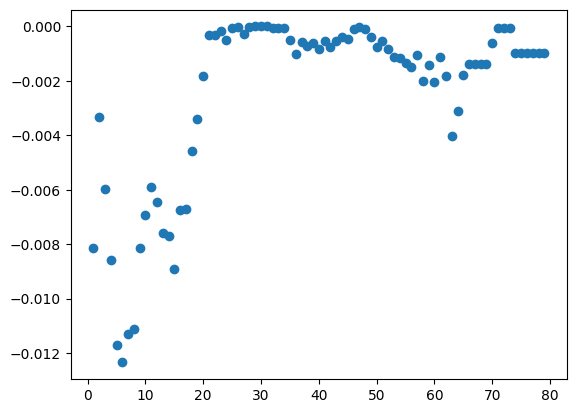

In [214]:
plt.scatter(ages, purity_gains)

In [215]:
#This graph shows how purity gains vary with age to split on

#Given that purity values are never significantly above zero,
#I conclude that quantization into 2 groups is unlikely to be preferable to imputation

In [216]:
#imputation

#because a range of other features in combination may tell us something about a person's age - their class, sex, sibs/pach numbers, deck
#And becuase we now only have one feature with missing values,
#I think that a regression-based imputer that takes into account all other values in the row would be reasobale

import numpy as np

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
Titanic_master_X_imputed = pd.DataFrame(imp.fit_transform(Titanic_master_X.drop(columns = ['test_train'], axis = 1)), columns = Titanic_master_X.drop(columns = ['test_train'], axis = 1).columns)



In [217]:
Titanic_master_X_imputed.isna().mean()

index              0.0
PassengerId        0.0
Pclass             0.0
Age                0.0
SibSp              0.0
Parch              0.0
Fare               0.0
female             0.0
Embarked_C         0.0
Embarked_Q         0.0
Embarked_S         0.0
Embarked_nan       0.0
deck_A             0.0
deck_B             0.0
deck_C             0.0
deck_D             0.0
deck_E             0.0
deck_F             0.0
deck_G             0.0
deck_T             0.0
deck_unknown       0.0
title_ Capt        0.0
title_ Col         0.0
title_ Don         0.0
title_ Dona        0.0
title_ Dr          0.0
title_ Jonkheer    0.0
title_ Lady        0.0
title_ Major       0.0
title_ Master      0.0
title_ Miss        0.0
title_ Mlle        0.0
title_ Mme         0.0
title_ Mr          0.0
title_ Mrs         0.0
title_ Ms          0.0
title_ Rev         0.0
title_ Sir         0.0
title_ th          0.0
dtype: float64

In [218]:
Titanic_master_X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            1309 non-null   float64
 1   PassengerId      1309 non-null   float64
 2   Pclass           1309 non-null   float64
 3   Age              1309 non-null   float64
 4   SibSp            1309 non-null   float64
 5   Parch            1309 non-null   float64
 6   Fare             1309 non-null   float64
 7   female           1309 non-null   float64
 8   Embarked_C       1309 non-null   float64
 9   Embarked_Q       1309 non-null   float64
 10  Embarked_S       1309 non-null   float64
 11  Embarked_nan     1309 non-null   float64
 12  deck_A           1309 non-null   float64
 13  deck_B           1309 non-null   float64
 14  deck_C           1309 non-null   float64
 15  deck_D           1309 non-null   float64
 16  deck_E           1309 non-null   float64
 17  deck_F        

In [219]:
Titanic_master_X_imputed['test_train'] = Titanic_master_X['test_train']

# Data Preparation - Transforming Data

Age, Fare, SibSp, Parch need to be transformed as they currently have larger values than the binary column, which will interfere with separator-based models(svm, knn) and impact efficiency of GD-based models (LogReg).

Need to also consider what to do with class - could scale or OHE. OHE loses ordinality, but scaling treats intervals between classes as equal, when it is likely that gap between 3-2 > 2-1 based on death rates

In [220]:
#First I'll look at the distributions for Parch, SibSp, Age and Fare

(array([1002.,  170.,  113.,    8.,    6.,    6.,    2.,    0.,    0.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

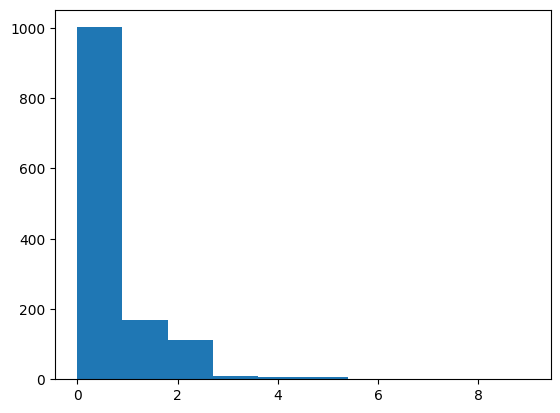

In [221]:
plt.hist(Titanic_master_X_imputed.Parch)

In [222]:
Titanic_master_X_imputed.Parch.median()

0.0

In [223]:
#strong left-skew, small range, 0 is mode and median

(array([891., 319.,  42.,  20.,   0.,  22.,   6.,   0.,   0.,   9.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

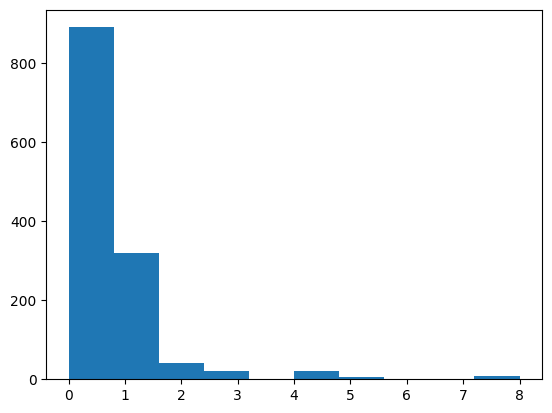

In [224]:
plt.hist(Titanic_master_X_imputed.SibSp)

In [225]:
#similar dynamic

(array([ 55.,  52., 169., 454., 262., 166.,  84.,  49.,  15.,   3.]),
 array([-4.28608586,  4.14252272, 12.57113131, 20.9997399 , 29.42834848,
        37.85695707, 46.28556566, 54.71417424, 63.14278283, 71.57139141,
        80.        ]),
 <BarContainer object of 10 artists>)

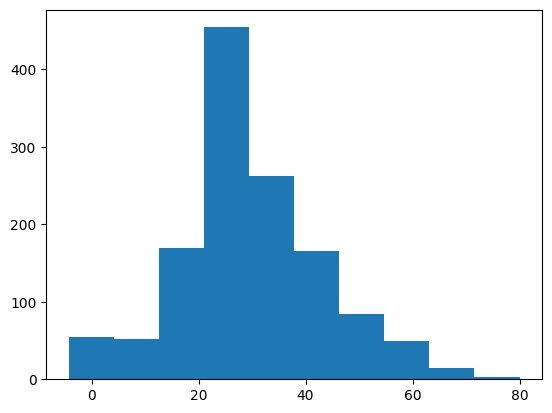

In [226]:
plt.hist(Titanic_master_X_imputed.Age)

In [227]:
#an approx normal distribution, without much influence from outliers - Mathusila not on board
#min_max scaling between 0-1 would make sense, and would put feature on same scale as binary categories

(array([1071.,  154.,   42.,    4.,   21.,   13.,    0.,    0.,    0.,
           4.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

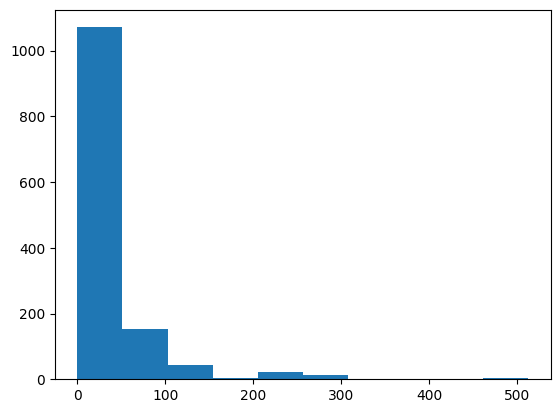

In [228]:
plt.hist(Titanic_master_X_imputed.Fare)

(array([ 20., 739., 295., 143.,  45.,  29.,  21.,  13.,   0.,   4.]),
 array([ 0.        ,  2.26346902,  4.52693804,  6.79040706,  9.05387608,
        11.3173451 , 13.58081411, 15.84428313, 18.10775215, 20.37122117,
        22.63469019]),
 <BarContainer object of 10 artists>)

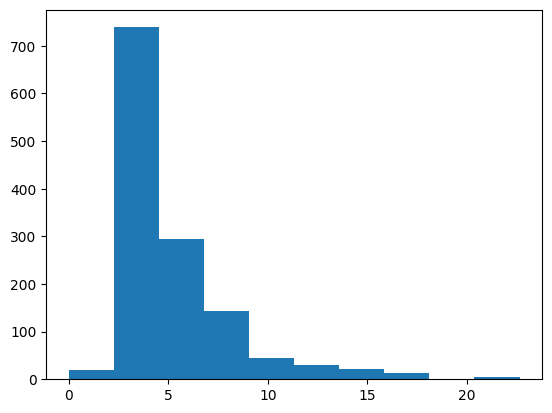

In [229]:
plt.hist((Titanic_master_X_imputed.Fare)**0.5)

(array([  3., 437., 216., 149., 224.,  94.,  95.,  36.,  34.,   4.]),
 array([1.15398392, 1.66248227, 2.17098062, 2.67947896, 3.18797731,
        3.69647565, 4.204974  , 4.71347235, 5.22197069, 5.73046904,
        6.23896739]),
 <BarContainer object of 10 artists>)

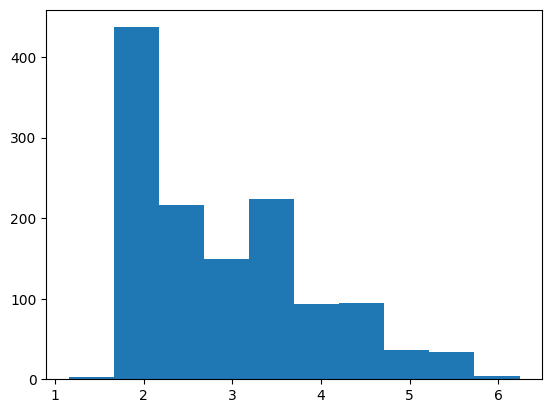

In [230]:
plt.hist(np.log(np.array(Titanic_master_X_imputed[Titanic_master_X_imputed.Fare !=0].Fare)))

In [231]:
#using a sqrt transformation, has the benefit of being better at handling fare = 0

#will need to then squash it between 0 and 1, so that it has same scale as other features

In [232]:
Titanic_master_X_imputed.Fare.min()

0.0

In [233]:
#Based on the above, I want to scale age, sibsp, parch between 0-1; and I want to squareroot and scale Fare
#generally the operations scaling and sqrting are not commutative, however, they are when the minimum value of a sequence is 0

#so I can scale the abovementioned features together, and then sqrt Fare

In [234]:
def nought_one_scaler (df, column_name):

  column = np.array(df[column_name])
  col_max = column.max()
  col_min = column.min()

  scaled = []

  for i in column:

    scaled_i = (i - col_min)/(col_max - col_min)

    scaled.append(scaled_i)

  return scaled



In [235]:
Titanic_master_X_imputed['age_scaled'] = nought_one_scaler(Titanic_master_X_imputed, 'Age')

Titanic_master_X_imputed['parch_scaled'] = nought_one_scaler(Titanic_master_X_imputed, 'Parch')

Titanic_master_X_imputed['Sibsp_scaled'] = nought_one_scaler(Titanic_master_X_imputed, 'SibSp')

Titanic_master_X_imputed['Fare_scaled'] = nought_one_scaler(Titanic_master_X_imputed, 'Fare')

In [236]:
Titanic_master_X_imputed['Fare_scaled_sqrt'] = Titanic_master_X_imputed['Fare_scaled']**0.5

In [237]:
Titanic_master_X_imputed.describe()

,index,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,Embarked_C,Embarked_Q,...,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ th,age_scaled,parch_scaled,Sibsp_scaled,Fare_scaled,Fare_scaled_sqrt
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,369.478992,655.000000,2.294882,29.663445,0.498854,0.385027,33.280206,0.355997,0.206264,0.093965,...,0.150497,0.001528,0.006112,0.000764,0.000764,0.402789,0.042781,0.062357,0.064959,0.216866
std,248.767105,378.020061,0.837836,13.434280,1.041658,0.865560,51.741830,0.478997,0.404777,0.291891,...,0.357694,0.039073,0.077967,0.027639,0.027639,0.159389,0.096173,0.130207,0.100993,0.133945
min,0.000000,1.000000,1.000000,-4.286086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.311867,0.000000,0.000000,0.015412,0.124143
50%,327.000000,655.000000,3.000000,28.500000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.388986,0.000000,0.000000,0.028213,0.167966
75%,563.000000,982.000000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.489833,0.000000,0.125000,0.061045,0.247072
max,890.000000,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [238]:
Titanic_X_prepared_1 = Titanic_master_X_imputed.copy(deep = True)

Titanic_X_prepared_1.drop(['Age', 'Fare', 'SibSp', 'Parch', 'Fare_scaled', 'index'], axis = 1, inplace = True)

In [239]:
Titanic_X_prepared_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   float64
 1   Pclass            1309 non-null   float64
 2   female            1309 non-null   float64
 3   Embarked_C        1309 non-null   float64
 4   Embarked_Q        1309 non-null   float64
 5   Embarked_S        1309 non-null   float64
 6   Embarked_nan      1309 non-null   float64
 7   deck_A            1309 non-null   float64
 8   deck_B            1309 non-null   float64
 9   deck_C            1309 non-null   float64
 10  deck_D            1309 non-null   float64
 11  deck_E            1309 non-null   float64
 12  deck_F            1309 non-null   float64
 13  deck_G            1309 non-null   float64
 14  deck_T            1309 non-null   float64
 15  deck_unknown      1309 non-null   float64
 16  title_ Capt       1309 non-null   float64


In [240]:
#am keeping passenger ID in place for time being to ensure I perfectly separate train and test

In [241]:
#key question now is what to do with Pclass column.

#benefits of OHE is that it doesn't impose equal-interval ordinality
#(being upgraded from 3rd to 2nd, would have bigger impact on your survival chances than 2md to 1st)
#drawback is that it loses all ordinality, and that it adds two features

#benefits of scaling is that it keeps ordinality (though assumes equal intervals), minimises feature numbers
#however, there is a question of how you encode
#should any class be 0 - for LR model this could mean the constant is highly influenced

#my solution is to use both methods and store them in separate datasets, both of which I will use as part of model
#selection. I can thus see which is better empirically

In [242]:
Titanic_X_with_class_OHE = Titanic_X_prepared_1.copy(deep = True)
Titanic_X_with_class_scaled = Titanic_X_prepared_1.copy(deep = True)


Titanic_X_with_class_OHE = pd.concat([Titanic_X_with_class_OHE, OHE(Titanic_X_with_class_OHE.Pclass) ], axis = 1)
Titanic_X_with_class_OHE.drop(columns = ['Pclass'], axis = 1, inplace = True)

Titanic_X_with_class_OHE.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       1309 non-null   float64
 1   female            1309 non-null   float64
 2   Embarked_C        1309 non-null   float64
 3   Embarked_Q        1309 non-null   float64
 4   Embarked_S        1309 non-null   float64
 5   Embarked_nan      1309 non-null   float64
 6   deck_A            1309 non-null   float64
 7   deck_B            1309 non-null   float64
 8   deck_C            1309 non-null   float64
 9   deck_D            1309 non-null   float64
 10  deck_E            1309 non-null   float64
 11  deck_F            1309 non-null   float64
 12  deck_G            1309 non-null   float64
 13  deck_T            1309 non-null   float64
 14  deck_unknown      1309 non-null   float64
 15  title_ Capt       1309 non-null   float64
 16  title_ Col        1309 non-null   float64


In [243]:
#Titanic_X_with_class_scaled

#for class scaling I will scale as such
# 1st --> 1, 2nd --> 2/3, 3rd --> 1/3

#this way I avoid treating any classes as zero

scaled_class = []

for i in Titanic_X_with_class_scaled.Pclass:

  if i == 1:
    scaled_class.append(1)

  elif i == 2:
    scaled_class.append(2/3)

  elif i ==3:
    scaled_class.append(1/3)

Titanic_X_with_class_scaled['scaled_class'] = scaled_class
Titanic_X_with_class_scaled.drop(columns = ['Pclass'], axis =1, inplace = True)

In [244]:
Titanic_X_with_class_scaled.describe()

,PassengerId,female,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,deck_A,deck_B,deck_C,deck_D,...,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ th,age_scaled,parch_scaled,Sibsp_scaled,Fare_scaled_sqrt,scaled_class
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.355997,0.206264,0.093965,0.698243,0.001528,0.016807,0.049656,0.071811,0.035141,...,0.150497,0.001528,0.006112,0.000764,0.000764,0.402789,0.042781,0.062357,0.216866,0.568373
std,378.020061,0.478997,0.404777,0.291891,0.459196,0.039073,0.128596,0.217317,0.258273,0.184207,...,0.357694,0.039073,0.077967,0.027639,0.027639,0.159389,0.096173,0.130207,0.133945,0.279279
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
25%,328.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.311867,0.000000,0.000000,0.124143,0.333333
50%,655.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.388986,0.000000,0.000000,0.167966,0.333333
75%,982.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.489833,0.000000,0.125000,0.247072,0.666667
max,1309.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preparation - feature selection

From univariate and multivariate information gain, relative to target variable, I already know:

- female and fare variables have most information considered individually
- deck_unknown, class, deck_f, embarked_s, and deck_b gave more information than passengerID (a benchmark for randomness), age gave similar
- sex and title have a lot of shared information, but there is info gain from including both
- deck, fare, class have a lot of shared information but there is infor gain from including both

I now want to use SK Learn's Sequential Feature Selection function (sfs) to provide further information on which are the best features.

Using SFS I will identify the top ten features predicted by given models.

I will review the results to identify which features are commonly amongst the top ten.

I will also use lasso regression to get further insight into the best features, by identifying the features with the largest absolute coefficient.



In [245]:
#set up a full set of IV and DV and then further subdivide these into test and train (/ use CV methods that do this automatically)
#I will only use these sets for this section, and will continue with the Titanic_X...lineage

In [246]:
Titanic_feature_selection_full = Titanic_X_with_class_OHE.copy(deep = True)

Titanic_feature_selection_full['class_scaled'] = Titanic_X_with_class_scaled.scaled_class

Titanic_feature_selection_full['test_train'] = Titanic_master_X['test_train']

Titanic_feature_selection_full = Titanic_feature_selection_full[Titanic_feature_selection_full['test_train']== 'train']

Titanic_feature_selection_full['Survived'] = Titanic_train_og['Survived']



In [247]:
Titanic_feature_selection_full.drop(columns = ['test_train'], axis = 1, inplace = True)

In [248]:
#set up models for feature selection:

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SequentialFeatureSelector as sfs


#prepare models

KNN_model = KNeighborsClassifier()
RF_model = RandomForestClassifier()
SVM_model = svm.SVC()


In [249]:
#define a function that will take in a df, a model, a direction, and number of features; and return a new df with selected features, along with
#the avg accuracy of this model/df combo, and also the avg accuracy of the model/og df combo

def select_features_compare_performance(X,y, model, seq_direction = 'forward', n_features = 'auto'):



  cv_folds= KFold(n_splits = 5, shuffle = True)
  SFS = sfs(model, n_features_to_select= n_features, direction = seq_direction, scoring = 'accuracy', cv = cv_folds)

  X_fs = Titanic_feature_selection_full.drop(columns = ['Survived'], axis = 1)
  y_fs = Titanic_feature_selection_full.Survived

  new_X_array = SFS.fit_transform(X_fs,y_fs)
  kept_columns = X.columns[SFS.get_support()]

  new_X = pd.DataFrame(SFS.fit_transform(X_fs,y_fs), columns = kept_columns)

  Cv_scores_new_X = cross_val_score(model, new_X, y, cv = cv_folds, scoring = "accuracy")

  mean_accuracy_new_X = np.mean(Cv_scores_new_X )
  std_accuracy_new_X = np.std(Cv_scores_new_X )


  Cv_scores_og_X = cross_val_score(model, X, y, cv = cv_folds, scoring = "accuracy")

  mean_accuracy_og_X = np.mean(Cv_scores_og_X)


  storage = [kept_columns, mean_accuracy_new_X, std_accuracy_new_X, mean_accuracy_og_X]

  return storage


In [251]:
#using the function, I want to vary the following inputs:

#- model
#-forward/backward
#I will create a table to store all information in, and run loops to fill in the table

FS_findings = pd.DataFrame([(x, y) for x in [KNN_model, RF_model, SVM_model] for y in ['forward', 'backward']], columns = ['model', 'direction'])
FS_findings = pd.concat([FS_findings, pd.DataFrame({'features': [1], 'mean_accuracy':[1], 'std_accuracy':[1], 'baseline_accuracy':[1]})], axis = 1)



In [252]:
X = Titanic_feature_selection_full.drop(['Survived'], axis = 1)
y = Titanic_feature_selection_full.Survived

for i in range(0, len(FS_findings)):

  predictor = FS_findings.iloc[i,0]
  direction = FS_findings.iloc[i,1]
  function_results = select_features_compare_performance(X,y, model = predictor, seq_direction = direction, n_features = 10)

  #features
  FS_findings.iloc[i,2] = str(function_results[0])
  #mean accuracy
  FS_findings.iloc[i,3] = function_results[1]
  #mean st
  FS_findings.iloc[i,4] = function_results[2]
  #baseline acccuracy
  FS_findings.iloc[i,5] = function_results[3]



In [254]:
pd.set_option('display.max_colwidth', None)
FS_findings

,model,direction,features,mean_accuracy,std_accuracy,baseline_accuracy
0,KNeighborsClassifier(),forward,"Index(['female', 'Embarked_nan', 'deck_E', 'title_ Dona', 'title_ Major',\n 'title_ Master', 'parch_scaled', 'Sibsp_scaled', 'Fare_scaled_sqrt',\n 'Pclass_3.0'],\n dtype='object')",0.829408,0.018635,0.567918
1,KNeighborsClassifier(),backward,"Index(['female', 'Embarked_nan', 'deck_F', 'title_ Miss', 'title_ Mlle',\n 'title_ Mr', 'age_scaled', 'Sibsp_scaled', 'Fare_scaled_sqrt',\n 'class_scaled'],\n dtype='object')",0.818178,0.029872,0.566832
2,RandomForestClassifier(),forward,"Index(['female', 'Embarked_C', 'Embarked_Q', 'deck_E', 'title_ Col',\n 'title_ Jonkheer', 'title_ Master', 'title_ Mrs', 'Sibsp_scaled',\n 'Pclass_3.0'],\n dtype='object')",0.840631,0.014439,0.821530
3,RandomForestClassifier(),backward,"Index(['PassengerId', 'deck_C', 'title_ Major', 'title_ Miss', 'title_ Mme',\n 'title_ Mr', 'age_scaled', 'Fare_scaled_sqrt', 'Pclass_1.0',\n 'Pclass_2.0'],\n dtype='object')",0.827186,0.019329,0.812523
4,SVC(),forward,"Index(['female', 'Embarked_S', 'Embarked_nan', 'deck_B', 'title_ Col',\n 'title_ Master', 'title_ Sir', 'Sibsp_scaled', 'Fare_scaled_sqrt',\n 'Pclass_3.0'],\n dtype='object')",0.832747,0.031170,0.616157
5,SVC(),backward,"Index(['female', 'Embarked_C', 'Embarked_Q', 'deck_E', 'deck_T', 'title_ Capt',\n 'title_ Don', 'title_ Master', 'title_ Mlle', 'Pclass_3.0'],\n dtype='object')",0.828297,0.030185,0.616101


In [ ]:
#Key takeaways:

#female appears in most top 10 lists
#Class_3 appears numerous times, class scaled only appears once
#Embarked and title features appear often
#age scaled appears twice

#Overall sense is that the lists of top tens are very different from each other

In [255]:
lasso_model = Lasso(alpha =0.001)

lasso_model.fit(X,y)

a = pd.DataFrame({'features':X.columns, 'coefs': lasso_model.coef_})

a['abs_coefs'] = np.abs(a.coefs)

a.sort_values(by = ['abs_coefs'], ascending = False)



,features,coefs,abs_coefs
35,Sibsp_scaled,-0.509716,0.509716
1,female,0.435254,0.435254
23,title_ Master,0.411977,0.411977
34,parch_scaled,-0.290576,0.290576
33,age_scaled,-0.277407,0.277407
36,Fare_scaled_sqrt,0.156953,0.156953
39,Pclass_3.0,-0.156174,0.156174
10,deck_E,0.111946,0.111946
30,title_ Rev,-0.111168,0.111168
14,deck_unknown,-0.104001,0.104001


In [ ]:
#Given that many of the features appear in a top ten list at least once, and given that
#my analysis of shared information gain showed that there was often a benefit to including more features
#Even where features overlapped in the information they confered
#There is an argument to keep most of the features

#That said, it may reduce overfitting to put forward a more focused dataset in terms of features.

#My approach will be to create two datasets to use as inputs to model-data couples.
#one data set will use minimal useful features
#(based on Lasso and SFS, these will be SibSp, female, Master, age_scaled, Fare, Pclass = 3)
#and one data set that uses all features (apart from not using age_scaled, as OHE options will be prefered)

In [256]:
Titanic_X_with_class_OHE.columns

Index(['PassengerId', 'female', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'deck_T', 'deck_unknown', 'title_ Capt',
       'title_ Col', 'title_ Don', 'title_ Dona', 'title_ Dr',
       'title_ Jonkheer', 'title_ Lady', 'title_ Major', 'title_ Master',
       'title_ Miss', 'title_ Mlle', 'title_ Mme', 'title_ Mr', 'title_ Mrs',
       'title_ Ms', 'title_ Rev', 'title_ Sir', 'title_ th', 'test_train',
       'age_scaled', 'parch_scaled', 'Sibsp_scaled', 'Fare_scaled_sqrt',
       'Pclass_1.0', 'Pclass_2.0', 'Pclass_3.0'],
      dtype='object')

In [257]:
Titanic_X_minimal = Titanic_X_with_class_OHE[['Sibsp_scaled', 'female', 'title_ Master', 'age_scaled', 'Pclass_3.0', 'Fare_scaled_sqrt', 'PassengerId']]
Titanic_X_maximal = Titanic_X_with_class_OHE.copy(deep = True)



# Data Preparations - final prep

In [ ]:
#To evaluate models, I will need:

#split the data into test and train (i.e. from the og test and train sets respectively)
#add Survival data to the train set

#the train set can then be further broken down for training and testing, and the real test set is held out for final predictions

In [259]:
Titanic_X_minimal['test_train'] =Titanic_master_X.loc[:,'test_train']
Titanic_X_maximal['test_train'] = Titanic_master_X.loc[:,'test_train']

<ipython-input-259-9533c0787a7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_X_minimal['test_train'] =Titanic_master_X.loc[:,'test_train']


In [260]:
Titanic_X_test_minimal = Titanic_X_minimal[Titanic_X_minimal['test_train'] == 'test']
Titanic_X_test_maximal = Titanic_X_maximal[Titanic_X_maximal['test_train'] == 'test']

Titanic_Xy_train_minimal = pd.concat([Titanic_X_minimal[Titanic_X_minimal['test_train'] == 'train'], Titanic_train_og[['Survived']]], axis = 1)

Titanic_Xy_train_maximal = pd.concat([Titanic_X_maximal[Titanic_X_maximal['test_train'] == 'train'], Titanic_train_og[['Survived']]], axis = 1)

In [ ]:
#inspect dfs
#check all data is appropriately tagged as test or train
#make sure number of observations, and passenger Ids align with og_dfs

In [261]:
Titanic_X_test_minimal.test_train.unique()

array(['test'], dtype=object)

In [262]:
Titanic_X_test_maximal.test_train.unique()

array(['test'], dtype=object)

In [263]:
Titanic_test_og.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [264]:
Titanic_X_test_minimal.describe()

,Sibsp_scaled,female,title_ Master,age_scaled,Pclass_3.0,Fare_scaled_sqrt,PassengerId
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.055921,0.363636,0.050239,0.404904,0.521531,0.222280,1100.500000
std,0.112095,0.481622,0.218700,0.156270,0.500135,0.141687,120.810458
min,0.000000,0.000000,0.000000,0.052869,0.000000,0.000000,892.000000
25%,0.000000,0.000000,0.000000,0.311867,0.000000,0.124143,996.250000
50%,0.000000,0.000000,0.000000,0.386136,1.000000,0.167966,1100.500000
75%,0.125000,1.000000,0.000000,0.489833,1.000000,0.247849,1204.750000
max,1.000000,1.000000,1.000000,0.952543,1.000000,1.000000,1309.000000


In [265]:
Titanic_X_test_maximal.describe()

,PassengerId,female,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,deck_A,deck_B,deck_C,deck_D,...,title_ Rev,title_ Sir,title_ th,age_scaled,parch_scaled,Sibsp_scaled,Fare_scaled_sqrt,Pclass_1.0,Pclass_2.0,Pclass_3.0
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,...,418.000000,418.0,418.0,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,0.244019,0.110048,0.645933,0.0,0.016746,0.043062,0.083732,0.031100,...,0.004785,0.0,0.0,0.404904,0.043594,0.055921,0.222280,0.255981,0.222488,0.521531
std,120.810458,0.481622,0.430019,0.313324,0.478803,0.0,0.128474,0.203240,0.277317,0.173797,...,0.069088,0.0,0.0,0.156270,0.109048,0.112095,0.141687,0.436934,0.416416,0.500135
min,892.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.052869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.311867,0.000000,0.000000,0.124143,0.000000,0.000000,0.000000
50%,1100.500000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.386136,0.000000,0.000000,0.167966,0.000000,0.000000,1.000000
75%,1204.750000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.489833,0.000000,0.125000,0.247849,1.000000,0.000000,1.000000
max,1309.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,0.952543,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#satisfied that X_test data is properly aligned with test data set

In [266]:
Titanic_Xy_train_maximal.test_train.unique()

array(['train'], dtype=object)

In [267]:
Titanic_Xy_train_minimal.test_train.unique()

array(['train'], dtype=object)

In [268]:
Titanic_train_og.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [269]:
Titanic_Xy_train_minimal.describe()

,Sibsp_scaled,female,title_ Master,age_scaled,Pclass_3.0,Fare_scaled_sqrt,PassengerId,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.065376,0.352413,0.044893,0.401797,0.551066,0.214327,446.000000,0.383838
std,0.137843,0.477990,0.207186,0.160909,0.497665,0.130159,257.353842,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.304802,0.000000,0.124258,223.500000,0.000000
50%,0.000000,0.000000,0.000000,0.392020,1.000000,0.167966,446.000000,0.000000
75%,0.125000,1.000000,0.000000,0.486867,1.000000,0.245984,668.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,891.000000,1.000000


In [270]:
Titanic_Xy_train_maximal.describe()

,PassengerId,female,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,deck_A,deck_B,deck_C,deck_D,...,title_ Sir,title_ th,age_scaled,parch_scaled,Sibsp_scaled,Fare_scaled_sqrt,Pclass_1.0,Pclass_2.0,Pclass_3.0,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.352413,0.188552,0.086420,0.722783,0.002245,0.016835,0.052750,0.066218,0.037037,...,0.001122,0.001122,0.401797,0.042399,0.065376,0.214327,0.242424,0.206510,0.551066,0.383838
std,257.353842,0.477990,0.391372,0.281141,0.447876,0.047351,0.128725,0.223659,0.248802,0.188959,...,0.033501,0.033501,0.160909,0.089562,0.137843,0.130159,0.428790,0.405028,0.497665,0.486592
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.304802,0.000000,0.000000,0.124258,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.392020,0.000000,0.000000,0.167966,0.000000,0.000000,1.000000,0.000000
75%,668.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.486867,0.000000,0.125000,0.245984,0.000000,0.000000,1.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#satisfied that Titanic_Xy_train_min and max are almost good to go

#just need to remove passenger Id and test train

In [271]:
Titanic_Xy_train_minimal.drop(columns = ['test_train', 'PassengerId'], axis = 1, inplace = True)
Titanic_Xy_train_maximal.drop(columns = ['test_train', 'PassengerId'], axis = 1, inplace = True)

Titanic_X_test_minimal.drop(columns = ['test_train', 'PassengerId'], axis = 1, inplace = True)
Titanic_X_test_maximal.drop(columns = ['test_train', 'PassengerId'], axis = 1, inplace = True)

<ipython-input-271-f0353d93f9ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_X_test_minimal.drop(columns = ['test_train', 'PassengerId'], axis = 1, inplace = True)
<ipython-input-271-f0353d93f9ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_X_test_maximal.drop(columns = ['test_train', 'PassengerId'], axis = 1, inplace = True)


# Develop and test ML models

In this section, I will develop and test a variety of ML models (different classifiers with varying hyperparameters) in order to identify the best models to use as predictors.

My workflow will be:
- develop a function that takes in df, model and model param options - and gives out mean accuracy and std of the model
- run the function for four models, for each df
- collect the results in one large df

The collected results will then be used for analysis where I will either select a model/models or decide to fine tune parameters further

In [ ]:
#gscv function

def gscv(df, model, param_dict):

 y = df['Survived'].values

 X = df.drop(['Survived'], axis = 1)

 unfitted = GridSearchCV(estimator = model, param_grid = param_dict, scoring = 'accuracy')

 fitted = unfitted.fit(X,y)

 output_df = pd.DataFrame(fitted.cv_results_)

 output_df['model'] = str(model)
 output_df['params'] = output_df['params'].astype(str)

 output_df = output_df[['model', 'params','mean_test_score', 'std_test_score' ]]


 return output_df



In [ ]:
LogReg_params = {'C':[0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}
KNN_params = {'n_neighbors':[5,10,20,30,40,50,60], 'weights':['uniform', 'distance']}
RF_params = {'n_estimators': [50,100,150], 'criterion':['gini', 'entropy', 'log_loss'],
             'max_depth': [None, 10,50,100], 'min_samples_split':[1,2,3,4,5]}

SVM_params = {'C':  [0.001, 0.01, 0.1, 1, 10, 100],
      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
      'gamma': ['scale', 'auto']}

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg_model = LogisticRegression()
KNN_model = KNeighborsClassifier()
RF_model = RandomForestClassifier()

SVM_model = svm.SVC()

In [ ]:
#ONE DF PER MODEL-DF combination

df_1 = Titanic_Xy_train_minimal
df_2 = Titanic_Xy_train_maximal


KNN_gscv_1 = gscv(df_1 , KNN_model, KNN_params)
KNN_gscv_1['data_source'] = 1

KNN_gscv_2 = gscv(df_2 , KNN_model, KNN_params)
KNN_gscv_2['data_source'] = 2

LogReg_gscv_1 = gscv(df_1, LogReg_model, LogReg_params)
LogReg_gscv_1['data_source'] = 1

LogReg_gscv_2 = gscv(df_2, LogReg_model, LogReg_params)
LogReg_gscv_2['data_source'] = 2

RF_gscv_1 = gscv(df_1, RF_model, RF_params)
RF_gscv_1['data_source'] = 1

RF_gscv_2 = gscv(df_2, RF_model, RF_params)
RF_gscv_2['data_source'] = 2

SVM_gscv_1 = gscv(df_1, SVM_model, SVM_params)
SVM_gscv_1['data_source'] = 1

SVM_gscv_2 = gscv(df_2, SVM_model, SVM_params)
SVM_gscv_2['data_source'] = 2


Titanic_models_gscv = pd.concat([KNN_gscv_1, KNN_gscv_2, LogReg_gscv_1, LogReg_gscv_2, RF_gscv_1, RF_gscv_2, SVM_gscv_1, SVM_gscv_2 ], axis = 0)

Titanic_models_gscv.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)


Titanic_models_gscv

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,model,params,mean_test_score,std_test_score,data_source
83,RandomForestClassifier(),"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 150}",0.833902,0.017177,2
141,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 50}",0.832766,0.025755,2
27,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}",0.831699,0.025945,1
23,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 150}",0.831649,0.025377,2
87,RandomForestClassifier(),"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}",0.831643,0.017104,2
...,...,...,...,...,...
151,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 50, 'min_samples_split': 1, 'n_estimators': 100}",NaN,NaN,2
152,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 50, 'min_samples_split': 1, 'n_estimators': 150}",NaN,NaN,2
165,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 100, 'min_samples_split': 1, 'n_estimators': 50}",NaN,NaN,2
166,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 100, 'min_samples_split': 1, 'n_estimators': 100}",NaN,NaN,2


In [ ]:
Titanic_models_gscv.sort_values(by = ['mean_test_score'], ascending = False, inplace = True)
pd.set_option('display.max_rows', None)
Titanic_models_gscv.head(20)

,model,params,mean_test_score,std_test_score,data_source
142,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}",0.832766,0.022900,2
33,SVC(),"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.831618,0.030504,1
146,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 150}",0.830544,0.015032,1
147,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}",0.830532,0.015998,2
25,SVC(),"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.830500,0.027755,1
82,RandomForestClassifier(),"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}",0.829452,0.027752,1
145,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}",0.829414,0.023656,2
27,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}",0.829408,0.027866,2
83,RandomForestClassifier(),"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 150}",0.829402,0.020311,2
139,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}",0.829402,0.025788,2


# Evaluating models and fine-tuning parameters

Key insights:

- Top 20 only contains SVC and RF models
- For RF - max_depth = 10 gives best results, logloss and gini work better as spliting criterion than entropy
- For SVC - gamma = scale, kernel = poly/rbf
- SV works best with minimal set
- RF works best with maximal set

In [ ]:
#am going to use these insights to do a more focussed gridsearch

RF_params = {'n_estimators': [50,100,150], 'criterion':['gini', 'log_loss'],
             'max_depth': [4,6,8,10], 'min_samples_split':[1,2,3,4,5]}

SVM_params = {'C':  [1, 10, 25, 50, 75, 100],
      'kernel': [ 'poly', 'rbf'],
      'gamma': ['scale']}

In [ ]:
RF_GSV_new = gscv(df_2, RF_model, RF_params)

SVM_GSV_new = gscv(df_1, SVM_model, SVM_params)

GS_results_new = pd.concat([RF_GSV_new,SVM_GSV_new ], axis = 0).sort_values(by = ['mean_test_score'], ascending = False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

In [ ]:
GS_results_new.head(10)

,model,params,mean_test_score,std_test_score
98,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 150}",0.833890,0.019366
7,SVC(),"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.833865,0.031431
4,SVC(),"{'C': 25, 'gamma': 'scale', 'kernel': 'poly'}",0.833865,0.028701
9,SVC(),"{'C': 75, 'gamma': 'scale', 'kernel': 'rbf'}",0.832747,0.030557
5,SVC(),"{'C': 25, 'gamma': 'scale', 'kernel': 'rbf'}",0.832735,0.029124
23,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 150}",0.831655,0.015007
88,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 100}",0.831655,0.017348
58,RandomForestClassifier(),"{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}",0.831649,0.023030
80,RandomForestClassifier(),"{'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 150}",0.831643,0.018859
2,SVC(),"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.831618,0.030504


In [ ]:
#RF models have lower std
#will use top model (index 98) to make predictions, coupled with the Titanic_Xy_train_maximal dataset

#will also submit a result with top SVC model (index 7), coupled with the minimal dataset


# Making Predictions

In [ ]:
predictor = RandomForestClassifier(criterion = 'log_loss', max_depth = 8, min_samples_split = 3, n_estimators = 150)

df = Titanic_Xy_train_maximal

X_train = Titanic_Xy_train_maximal.drop(columns = ['Survived'], axis = 1)
y_train = Titanic_Xy_train_maximal.Survived

X_test = Titanic_X_test_maximal

predictor.fit(X_train,y_train)

predictions = predictor.predict(X_test)

predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
predictions.mean()

0.361244019138756

In [ ]:
results = pd.DataFrame({'PassengerID': Titanic_test_og.PassengerId, 'Survived': predictions })
results.to_csv('Titanic_survival_predictions_2608_1.csv', index = False)

In [ ]:
#score was 0.77511

In [ ]:
predictor_2 = svm.SVC(C = 50, gamma = 'scale', kernel = 'rbf')

df = Titanic_Xy_train_minimal

X_train = df.drop(columns = ['Survived'], axis = 1)
y_train = df.Survived

X_test = Titanic_X_test_minimal

predictor_2.fit(X_train,y_train)

predictions_2 = predictor_2.predict(X_test)

results_2 = pd.DataFrame({'PassengerID': Titanic_test_og.PassengerId, 'Survived': predictions_2 })
results.to_csv('Titanic_survival_predictions_2608_2.csv', index = False)

In [ ]:
#score was also 0.77033